Epoch: 1 | Loss: 0.3842571082337444
Epoch: 2 | Loss: 0.5302803691446227
Epoch: 3 | Loss: 0.32115547820348406
Epoch: 4 | Loss: 0.25007053850035377
Epoch: 5 | Loss: 0.22432080903623586
Epoch: 6 | Loss: 0.20516408102479364
Epoch: 7 | Loss: 0.1851872148757383
Epoch: 8 | Loss: 0.17069651203306102
Epoch: 9 | Loss: 0.1756950436721401
Epoch: 10 | Loss: 0.19221241368838504
Epoch: 11 | Loss: 0.15044180977593832
Epoch: 12 | Loss: 0.15798513170069797
Epoch: 13 | Loss: 0.15262872705926034
Epoch: 14 | Loss: 0.13985357168501367
Epoch: 15 | Loss: 0.17904460500461436
Epoch: 16 | Loss: 0.16399538603442843
Epoch: 17 | Loss: 0.13544714102884578
Epoch: 18 | Loss: 0.15122392236095253
Epoch: 19 | Loss: 0.1301981322588843
Epoch: 20 | Loss: 0.13173064459548647
Epoch: 21 | Loss: 0.1214842532715638
Epoch: 22 | Loss: 0.10880838102452953
Epoch: 23 | Loss: 0.10951965691922186
Epoch: 24 | Loss: 0.11131215506001121
Epoch: 25 | Loss: 0.11549390011255302
Epoch: 26 | Loss: 0.12154623852656284
Epoch: 27 | Loss: 0.1104569

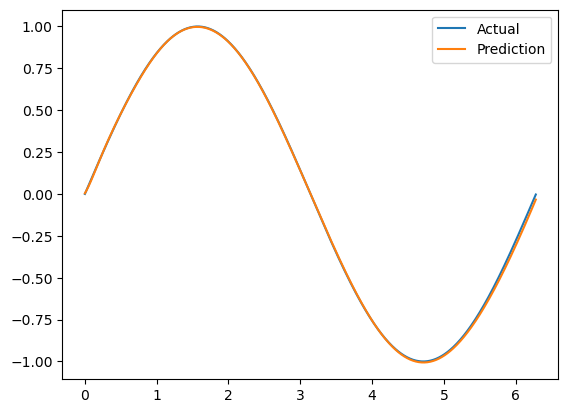

array('Flatten\nDense(1, 16)\nGeLU\nDense(16, 16)\nGeLU\nDense(16, 1)',
      dtype='<U57')

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import numpytorch as torch
import numpytorch.nn as nn
import numpytorch.optim as optim
from numpytorch.utils.data import TensorDataset
from numpytorch.utils.data.dataload import DataLoader

# Create a custom neural network class


class MyModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Define the layers of the neural network
        self.layers = [
            nn.Flatten(),
            nn.Linear(1, 16),
            nn.GeLU(),
            nn.Linear(16, 16),
            nn.GeLU(),
            nn.Linear(16, 1),
        ]


# Create an instance of the neural network class
model1 = MyModel()

# Load the training data
X_train = np.arange(0, 2 * np.pi, 0.01).reshape(-1, 1).astype(np.float64)
y_train = np.sin(X_train).astype(np.float64)

# Create a dataset object for the training data
train_data = TensorDataset(X_train, y_train, batch_size=32, shuffle=True)


# Define the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model1.layers, lr=0.01)


# Training Loop
epochs = 500
for epoch in range(epochs):
    running_loss_train = 0

    # Iterate over the batches of the training data
    for i, (batch_X, batch_y) in enumerate(train_data):
        # Forward pass
        y_pred = model1.forward(batch_X)

        # Compute the loss
        loss = loss_fn.forward(y_pred=y_pred, y_true=batch_y).mean()

        # Backpropagate the loss
        grad = loss_fn.backward(y_pred=y_pred, y_true=batch_y)
        model1.backward(grad)

        # Update the parameters
        optimizer.step()

        # Accumulate the running loss
        running_loss_train += loss

    # Average the running loss
    running_loss_train /= len(train_data)

    #                  rint the epoch number and the loss
    print(f"Epoch: {epoch+1} | Loss: {running_loss_train}")


# Try plotting the results

train_pred = model1.forward(X_train)

# plt.scatter(X_train, train_pred)
plt.plot(X_train, y_train, label='Actual')
plt.plot(X_train, train_pred, label='Prediction')
plt.legend()
plt.show()


# Save the model weights
model1.save('sin-model-1')


# Load model
loaded_model = MyModel()  # Random weights
loaded_model.load('sin-model-1.npz')  # Loads saved weights into loaded_model

Label files created successfully!
Converted 2850 images from 14 folders to MNIST format and saved to dataset/handpose_x_gesture_v1
Dataset split into training set (2280 samples) and testing set (570 samples)
Epoch: 1 | Loss: 32.86940278796539
Epoch: 2 | Loss: 20.952238799307565
Epoch: 3 | Loss: 19.946898803575003
Epoch: 4 | Loss: 18.995463210815046
Epoch: 5 | Loss: 18.397195091609195
Epoch: 6 | Loss: 18.415678271137622
Epoch: 7 | Loss: 18.005323442886006
Epoch: 8 | Loss: 17.832905742643295
Epoch: 9 | Loss: 17.73939001968169
Epoch: 10 | Loss: 17.362118412014997
Epoch: 11 | Loss: 17.529203943827373
Epoch: 12 | Loss: 17.539365169510212
Epoch: 13 | Loss: 17.177341412690527
Epoch: 14 | Loss: 17.20348209051271
Epoch: 15 | Loss: 17.60716794906332
Epoch: 16 | Loss: 17.645180569808385
Epoch: 17 | Loss: 17.73396351487351
Epoch: 18 | Loss: 17.32226338976657
Epoch: 19 | Loss: 17.619415659824014
Epoch: 20 | Loss: 17.806067322828


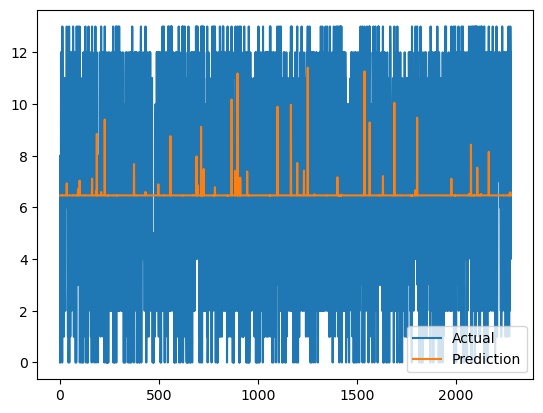

array('Flatten\nDense(784, 256)\nGeLU\nDense(256, 32)\nGeLU\nDense(32, 1)',
      dtype='<U61')

In [2]:
class MyModel2(nn.Module):
    def __init__(self):
        super().__init__()

        # Define the layers of the neural network
        self.layers = [
            nn.Flatten(),
            nn.Linear(784, 256),
            nn.GeLU(),
            nn.Linear(256, 32),
            nn.GeLU(),
            nn.Linear(32, 1),
        ]

root_folder = 'dataset/handpose_x_gesture_v1'
image_dataset = 'mnist_images.gz'
label_dataset = 'mnist_labels.gz'
train_image_dataset = 'train_mnist_images.gz'
train_label_dataset = 'train_mnist_labels.gz'
test_image_dataset = 'test_mnist_images.gz'
test_label_dataset = 'test_mnist_labels.gz'

loader = DataLoader(root_folder, image_dataset, label_dataset, train_image_dataset, train_label_dataset, test_image_dataset, test_label_dataset)
loader.create_labels()
loader.convert_to_mnist()
loader.split_data()

X_train, y_train = loader.load_mnist(train_image_dataset, train_label_dataset)
X_test, y_test = loader.load_mnist(test_image_dataset, test_label_dataset)

# Create an instance of the neural network class
model2 = MyModel2()

# Create a dataset object for the training data
train_data = TensorDataset(X_train, y_train, batch_size=16, shuffle=True)

# Define the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model2.layers, lr=0.01)


# Training Loop
epochs = 100
for epoch in range(epochs):
    running_loss_train = 0

    # Iterate over the batches of the training data
    for i, (batch_X, batch_y) in enumerate(train_data):
        # Forward pass
        y_pred = model2.forward(batch_X)

        # Compute the loss
        loss = loss_fn.forward(y_pred=y_pred, y_true=batch_y).mean()

        # Backpropagate the loss
        grad = loss_fn.backward(y_pred=y_pred, y_true=batch_y)
        model2.backward(grad)

        # Update the parameters
        optimizer.step()

        # Accumulate the running loss
        running_loss_train += loss

    # Average the running loss
    running_loss_train /= len(train_data)

    #                  rint the epoch number and the loss
    print(f"Epoch: {epoch+1} | Loss: {running_loss_train}")

    # Try plotting the results

train_pred = model2.forward(X_train)

# plt.scatter(X_train, train_pred)
x_label = np.arange(0,len(X_train))
plt.plot(x_label, y_train, label='Actual')
plt.plot(x_label, train_pred, label='Prediction')
plt.legend()
plt.show()


# Save the model weights
model2.save('img-model-1')


# Load model
loaded_model = MyModel()  # Random weights
loaded_model.load('img-model-1.npz')  # Loads saved weights into loaded_model